In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx


In [2]:
import scipy as sp
import scipy.optimize

In [3]:
all_relationships_df = pd.read_csv('../data/processed/all_relationships.csv', index_col=0)
book1_df = pd.read_csv("../data/processed/Book 1 - The Philosopher's Stone.csv", index_col=0)
book2_df = pd.read_csv('../data/processed/Book 2 - The Chamber of Secrets.csv', index_col=0)
book3_df = pd.read_csv('../data/processed/Book 3 - The Prisoner of Azkaban.csv', index_col=0)
book4_df = pd.read_csv('../data/processed/Book 4 - The Goblet of Fire.csv', index_col=0)
book5_df = pd.read_csv('../data/processed/Book 5 - The Order of the Phoenix.csv', index_col=0)
book6_df = pd.read_csv('../data/processed/Book 6 - The Half Blood Prince.csv', index_col=0)
book7_df = pd.read_csv('../data/processed/Book 7 - The Deathly Hallows.csv', index_col=0)


# Network maps for each of the 7 books

In [4]:
import sys
import os

src_dir = os.path.join(os.getcwd(),'..', 'src')
sys.path.append(src_dir)

from visualization.visualize import *

In [5]:
books =[book1_df, book2_df, book3_df, book4_df, book5_df, book6_df, book7_df]
titles = ['Book 1 - The Philosophers Stone', 'Book 2 - The Chamber of Secrets','Book 3 - The Prisoner of Azkaban','Book 4 - The Goblet of Fire','Book 5 - The Order of the Phoenix','Book 6 - The Half Blood Prince','Book 7 - The Deathly Hallows']

for book, title in zip(books,titles):
    create_map(book,title)


../reports/figures/networks/Book 1 - The Philosophers Stone_network.html
../reports/figures/networks/Book 2 - The Chamber of Secrets_network.html
../reports/figures/networks/Book 3 - The Prisoner of Azkaban_network.html
../reports/figures/networks/Book 4 - The Goblet of Fire_network.html
../reports/figures/networks/Book 5 - The Order of the Phoenix_network.html
../reports/figures/networks/Book 6 - The Half Blood Prince_network.html
../reports/figures/networks/Book 7 - The Deathly Hallows_network.html


In [5]:
G = nx.from_pandas_edgelist(all_relationships_df, 
                                source = "source", 
                                target = "target", 
                                edge_attr = "value", 
                                create_using = nx.Graph())     

In [6]:
dict(G.degree)

{'Dursley': 20,
 'Dudley': 50,
 'Harry': 394,
 'second': 132,
 'Harvey': 3,
 'Harold': 5,
 'Muggle': 101,
 'Jim': 3,
 'Ted': 25,
 'two': 165,
 'Petunia': 32,
 'Albus': 64,
 'Dumbledore': 190,
 'McGonagall': 112,
 'Dedalus': 10,
 'James': 40,
 'Lily': 33,
 'Hagrid': 130,
 'three': 130,
 'one': 169,
 'Vernon': 36,
 'Figg': 19,
 'Snowy': 3,
 'Paws': 2,
 'Tufty': 2,
 'Uncle': 28,
 'Yvonne': 2,
 'Aunt': 11,
 'Piers': 1,
 'Dennis': 16,
 'Malcolm': 7,
 'Gordon': 3,
 'Smeltings': 6,
 'Rubeus': 12,
 'Hogwarts': 86,
 'Minerva': 23,
 'Wizard': 14,
 'Bones': 5,
 'Cornelius': 33,
 'Adalbert': 4,
 'Phyllida': 1,
 'Tom': 29,
 'Doris': 2,
 'Welcome': 5,
 'Griphook': 32,
 'Slytherin': 80,
 'Vindictus': 2,
 'Ollivander': 18,
 'Hedwig': 50,
 'Ginny': 109,
 'Percy': 75,
 'George': 86,
 'Fred': 88,
 'Ron': 240,
 'Neville': 102,
 'Lee': 55,
 'Charlie': 35,
 'Bill': 65,
 'Ptolemy': 2,
 'Nicolas': 10,
 'Morgana': 4,
 'Alberic': 2,
 'Circe': 3,
 'Paracelsus': 5,
 'Merlin': 12,
 'Cliodna': 2,
 'Hermione': 158,


# Map of the top 1000 interactions across all 7 books

In [8]:
top_1000 = all_relationships_df.sort_values('value', ascending=False).head(1000)
create_map(top_1000, 'top1000')

../reports/figures/networks/top1000_network.html


In [9]:
top_1000 = all_relationships_df.sort_values('value', ascending=False).head(1000)
create_map(top_1000, 'top1000')

../reports/figures/networks/top1000_network.html


# Most Important characters

In [10]:
degree_dict = nx.degree_centrality(G)
degree_dict

{'Dursley': 0.0423728813559322,
 'Dudley': 0.1059322033898305,
 'Harry': 0.8347457627118644,
 'second': 0.2796610169491525,
 'Harvey': 0.006355932203389831,
 'Harold': 0.01059322033898305,
 'Muggle': 0.21398305084745764,
 'Jim': 0.006355932203389831,
 'Ted': 0.05296610169491525,
 'two': 0.3495762711864407,
 'Petunia': 0.06779661016949153,
 'Albus': 0.13559322033898305,
 'Dumbledore': 0.4025423728813559,
 'McGonagall': 0.23728813559322035,
 'Dedalus': 0.0211864406779661,
 'James': 0.0847457627118644,
 'Lily': 0.06991525423728813,
 'Hagrid': 0.2754237288135593,
 'three': 0.2754237288135593,
 'one': 0.3580508474576271,
 'Vernon': 0.07627118644067797,
 'Figg': 0.04025423728813559,
 'Snowy': 0.006355932203389831,
 'Paws': 0.00423728813559322,
 'Tufty': 0.00423728813559322,
 'Uncle': 0.059322033898305086,
 'Yvonne': 0.00423728813559322,
 'Aunt': 0.023305084745762712,
 'Piers': 0.00211864406779661,
 'Dennis': 0.03389830508474576,
 'Malcolm': 0.014830508474576272,
 'Gordon': 0.0063559322033898

<Axes: >

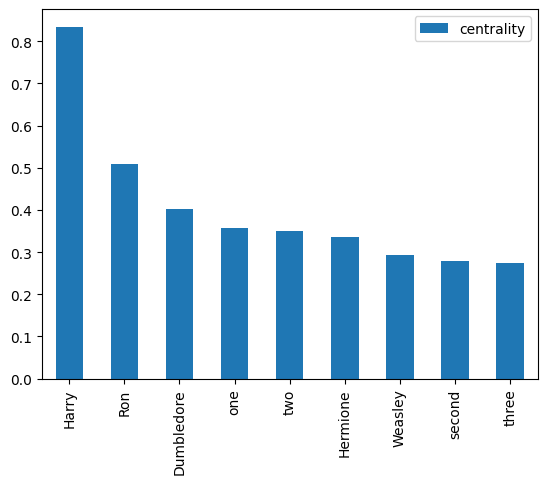

In [11]:
degree_df=pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind='bar')

<Axes: >

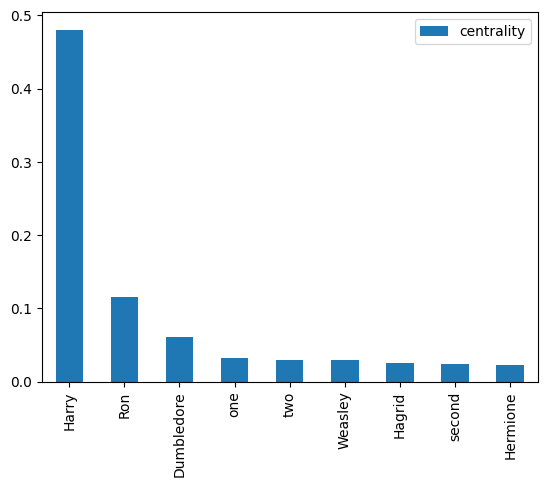

In [12]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<Axes: >

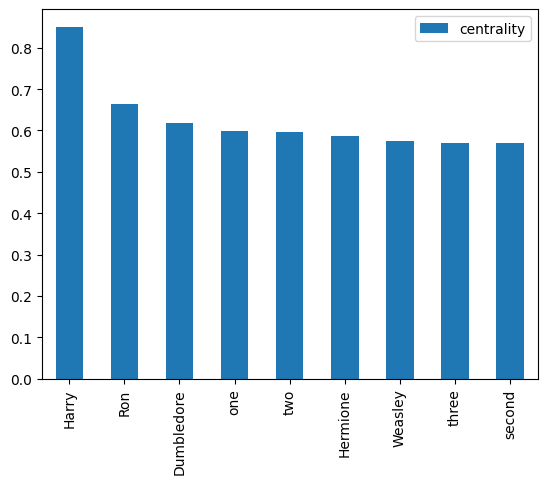

In [13]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

### Community detection


In [14]:
import community as community_louvain

In [15]:
communities = community_louvain.best_partition(G)

In [16]:
communities

{'Dursley': 0,
 'Dudley': 1,
 'Harry': 0,
 'second': 1,
 'Harvey': 0,
 'Harold': 0,
 'Muggle': 2,
 'Jim': 3,
 'Ted': 3,
 'two': 2,
 'Petunia': 1,
 'Albus': 2,
 'Dumbledore': 2,
 'McGonagall': 5,
 'Dedalus': 1,
 'James': 6,
 'Lily': 6,
 'Hagrid': 5,
 'three': 6,
 'one': 2,
 'Vernon': 1,
 'Figg': 1,
 'Snowy': 1,
 'Paws': 1,
 'Tufty': 1,
 'Uncle': 1,
 'Yvonne': 0,
 'Aunt': 1,
 'Piers': 1,
 'Dennis': 2,
 'Malcolm': 5,
 'Gordon': 1,
 'Smeltings': 1,
 'Rubeus': 1,
 'Hogwarts': 1,
 'Minerva': 5,
 'Wizard': 2,
 'Bones': 1,
 'Cornelius': 1,
 'Adalbert': 2,
 'Phyllida': 0,
 'Tom': 2,
 'Doris': 2,
 'Welcome': 0,
 'Griphook': 3,
 'Slytherin': 7,
 'Vindictus': 0,
 'Ollivander': 8,
 'Hedwig': 1,
 'Ginny': 8,
 'Percy': 1,
 'George': 7,
 'Fred': 7,
 'Ron': 6,
 'Neville': 6,
 'Lee': 7,
 'Charlie': 8,
 'Bill': 3,
 'Ptolemy': 6,
 'Nicolas': 2,
 'Morgana': 9,
 'Alberic': 9,
 'Circe': 9,
 'Paracelsus': 9,
 'Merlin': 6,
 'Cliodna': 6,
 'Hermione': 8,
 'Crabbe': 7,
 'Goyle': 7,
 'Malfoy': 7,
 'Draco': 6,
 't

In [17]:
books =[book1_df, book2_df, book3_df, book4_df, book5_df, book6_df, book7_df]
titles = ['Book 1 - The Philosophers Stone', 'Book 2 - The Chamber of Secrets','Book 3 - The Prisoner of Azkaban','Book 4 - The Goblet of Fire','Book 5 - The Order of the Phoenix','Book 6 - The Half Blood Prince','Book 7 - The Deathly Hallows']

for book, title in zip(books,titles):
    create_community(book,title)

../reports/figures/communities/Book 1 - The Philosophers Stone_communities.html
../reports/figures/communities/Book 2 - The Chamber of Secrets_communities.html
../reports/figures/communities/Book 3 - The Prisoner of Azkaban_communities.html
../reports/figures/communities/Book 4 - The Goblet of Fire_communities.html
../reports/figures/communities/Book 5 - The Order of the Phoenix_communities.html
../reports/figures/communities/Book 6 - The Half Blood Prince_communities.html
../reports/figures/communities/Book 7 - The Deathly Hallows_communities.html


In [18]:
create_community(all_relationships_df, 'all_books')

../reports/figures/communities/all_books_communities.html


### Evolution of characters' importance

In [7]:
import os

In [8]:
# Initialize empty list for graphs from books
books_graph = []
all_books = [b for b in os.scandir('../data/processed/') if 'Book' in b.name]

# Sort dir entries by name
all_books.sort(key=lambda x: x.name)

In [9]:
# Loop through book list and create graphs
for book in all_books:
    df = pd.read_csv('../data/processed/' + book.name, index_col=0)                                                                                                      
    
    # Create a graph from a pandas dataframe
    G = nx.from_pandas_edgelist(df, 
                                source = "source", 
                                target = "target", 
                                edge_attr = "value", 
                                create_using = nx.Graph())     
    
    books_graph.append(G) 

<Axes: >

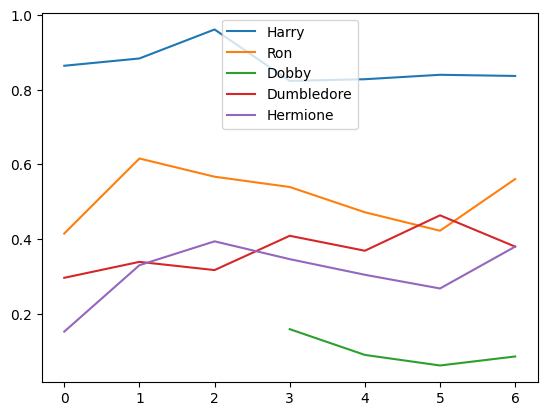

In [10]:
# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books_graph]

# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of 5 main characters
degree_evol_df[["Harry", "Ron", "Dobby", "Dumbledore", "Hermione"]].plot()